In [40]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
# Study data files
crop_production_path = "crop_production_clean.csv"
temp_file_path = "temperature_clean.csv"

In [42]:
crop_pro_results = pd.read_csv(crop_production_path,encoding="ISO-8859-1")
temp_read_results = pd.read_csv(temp_file_path,encoding="ISO-8859-1")
crop_pro_results =crop_pro_results[ ["Area","Item"] + list(crop_pro_results.loc[:,"Y1961":"Y2013"]) ]
crop_pro_results

#rename the columns for crop file 
renamed_crop_column=[]
for col in crop_pro_results.columns:
    renamed_crop_column.append(f'{col}_crop')
    
crop_pro_results.columns =renamed_crop_column


#compare with temp file country names
area_col=crop_pro_results["Area_crop"].unique()


In [43]:
# Temperature data set
temp_avg =temp_read_results[["AverageTemperature","year","Country"]]
temp_avg_df=pd.DataFrame(temp_avg).set_index("year")
temp_avg_df = temp_avg_df.reset_index()#.groupby("Country","year").AverageTemperature.mean()
temp_avg_grouped =pd.DataFrame(temp_avg_df).groupby(["Country","year"]).AverageTemperature.mean()
temp_avg_grouped=temp_avg_grouped.unstack()

#reset index to make country a column for merging
temp_avg_grouped=temp_avg_grouped.reset_index()


# Rename the columns for temp file
renamed_column =[]
for column in temp_avg_grouped.columns:
    renamed_column.append(f'{column}Temp')
    
temp_avg_grouped.columns =renamed_column
temp_avg_sorted=temp_avg_grouped.sort_values("CountryTemp")


#crop_results_sorted =crop_pro_results.sort_values("Area_crop")

#Rename country to match our country of focus
crop_country_list =temp_avg_sorted["CountryTemp"].values
for index,value in enumerate(crop_country_list):
    if value =="United States":#"United States of America"
        print(f'index:{index},value:{value}')
        #rename the country to match crop file for merging
        temp_avg_sorted["CountryTemp"][232]="United States of America"


#compare with crop file columns
#country_col =temp_avg_sorted["CountryTemp"].unique()


index:232,value:United States


In [44]:
#Merge the two data sets
combined_crop_temp_df= crop_pro_results.merge(temp_avg_sorted, how ="outer",left_on='Area_crop', right_on="CountryTemp", suffixes=(False, False))
combined_crop_temp_df =combined_crop_temp_df.dropna()


In [45]:
# Crop production in the US
usa_prod_df = combined_crop_temp_df.loc[combined_crop_temp_df['Area_crop']=="United States of America"]
usa_prod_df

,Area_crop,Item_crop,Y1961_crop,Y1962_crop,Y1963_crop,Y1964_crop,Y1965_crop,Y1966_crop,Y1967_crop,Y1968_crop,...,2002Temp,2003Temp,2004Temp,2005Temp,2006Temp,2007Temp,2008Temp,2009Temp,2010Temp,2011Temp
2929,United States of America,Wheat and products,13439.0,13314.0,13320.0,13525.0,13510.0,13479.0,13717.0,13840.0,...,9.816167,9.755083,9.6675,9.892667,9.9745,9.8375,8.951417,9.137083,9.505583,9.549917
2930,United States of America,Rice (Milled Equivalent),481.0,574.0,518.0,564.0,620.0,589.0,611.0,645.0,...,9.816167,9.755083,9.6675,9.892667,9.9745,9.8375,8.951417,9.137083,9.505583,9.549917
2931,United States of America,Barley and products,131.0,131.0,152.0,152.0,152.0,152.0,180.0,174.0,...,9.816167,9.755083,9.6675,9.892667,9.9745,9.8375,8.951417,9.137083,9.505583,9.549917
2932,United States of America,Maize and products,1470.0,1499.0,1526.0,1570.0,1628.0,1714.0,1694.0,1489.0,...,9.816167,9.755083,9.6675,9.892667,9.9745,9.8375,8.951417,9.137083,9.505583,9.549917
2933,United States of America,Rye and products,112.0,119.0,119.0,122.0,116.0,122.0,125.0,135.0,...,9.816167,9.755083,9.6675,9.892667,9.9745,9.8375,8.951417,9.137083,9.505583,9.549917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000,United States of America,Offals,376.0,381.0,390.0,391.0,397.0,405.0,425.0,439.0,...,9.816167,9.755083,9.6675,9.892667,9.9745,9.8375,8.951417,9.137083,9.505583,9.549917
3001,United States of America,Animal fats,2106.0,2219.0,2132.0,2077.0,2060.0,1848.0,1935.0,1995.0,...,9.816167,9.755083,9.6675,9.892667,9.9745,9.8375,8.951417,9.137083,9.505583,9.549917
3002,United States of America,Eggs,3342.0,3409.0,3424.0,3521.0,3526.0,3559.0,3695.0,3667.0,...,9.816167,9.755083,9.6675,9.892667,9.9745,9.8375,8.951417,9.137083,9.505583,9.549917
3003,United States of America,Milk - Excluding Butter,50289.0,49326.0,50260.0,50967.0,50757.0,51203.0,50105.0,50615.0,...,9.816167,9.755083,9.6675,9.892667,9.9745,9.8375,8.951417,9.137083,9.505583,9.549917


In [46]:
Tot_usa_prod_df =usa_prod_df[list(usa_prod_df.loc[:,"Area_crop":"Y2011_crop"])]
Tot_usa_prod_df["Results"]= Tot_usa_prod_df.apply(lambda column: column['Y1961_crop':'Y2011_crop'].sum(),axis = 1)
Tot_usa_prod_df.head()

,Area_crop,Item_crop,Y1961_crop,Y1962_crop,Y1963_crop,Y1964_crop,Y1965_crop,Y1966_crop,Y1967_crop,Y1968_crop,...,Y2003_crop,Y2004_crop,Y2005_crop,Y2006_crop,Y2007_crop,Y2008_crop,Y2009_crop,Y2010_crop,Y2011_crop,Results
2929,United States of America,Wheat and products,13439.0,13314.0,13320.0,13525.0,13510.0,13479.0,13717.0,13840.0,...,24801.0,24511.0,24869.0,25250.0,25793.0,25302.0,24959.0,25167.0,25050.0,980782.0
2930,United States of America,Rice (Milled Equivalent),481.0,574.0,518.0,564.0,620.0,589.0,611.0,645.0,...,1827.0,1943.0,2021.0,2075.0,2104.0,2104.0,2118.0,2194.0,2127.0,68559.0
2931,United States of America,Barley and products,131.0,131.0,152.0,152.0,152.0,152.0,180.0,174.0,...,153.0,158.0,152.0,162.0,164.0,169.0,166.0,167.0,164.0,7905.0
2932,United States of America,Maize and products,1470.0,1499.0,1526.0,1570.0,1628.0,1714.0,1694.0,1489.0,...,3879.0,3879.0,3887.0,3887.0,3887.0,3887.0,3913.0,3954.0,3969.0,137191.0
2933,United States of America,Rye and products,112.0,119.0,119.0,122.0,116.0,122.0,125.0,135.0,...,83.0,83.0,84.0,84.0,85.0,84.0,83.0,81.0,85.0,4255.0


In [47]:
sorted_Tot_usa_prod_df = Tot_usa_prod_df.sort_values(by=['Results'], ascending=False)
#maize_new = final_df[['Area', 'maize production']].copy()
clean_df=sorted_Tot_usa_prod_df.head(10)

In [48]:
clean_df.drop_duplicates()

,Area_crop,Item_crop,Y1961_crop,Y1962_crop,Y1963_crop,Y1964_crop,Y1965_crop,Y1966_crop,Y1967_crop,Y1968_crop,...,Y2003_crop,Y2004_crop,Y2005_crop,Y2006_crop,Y2007_crop,Y2008_crop,Y2009_crop,Y2010_crop,Y2011_crop,Results
3003,United States of America,Milk - Excluding Butter,50289.0,49326.0,50260.0,50967.0,50757.0,51203.0,50105.0,50615.0,...,76422.0,76008.0,76887.0,76329.0,78349.0,77704.0,79447.0,78596.0,78752.0,3190275.0
2994,United States of America,Vegetables,17713.0,18628.0,17584.0,17462.0,18097.0,18321.0,19603.0,21463.0,...,37102.0,39107.0,36668.0,37892.0,39116.0,35699.0,37686.0,37496.0,36650.0,1428504.0
2999,United States of America,Meat,16780.0,17181.0,18036.0,18920.0,18721.0,19587.0,20583.0,21158.0,...,36074.0,37160.0,37361.0,37776.0,38117.0,37598.0,36738.0,37103.0,36621.0,1424232.0
2995,United States of America,Fruits - Excluding Wine,14529.0,15082.0,13671.0,14322.0,15216.0,16297.0,17208.0,15931.0,...,33495.0,34329.0,32749.0,32658.0,33384.0,35303.0,33813.0,32212.0,30768.0,1333916.0
2987,United States of America,Cereals - Excluding Beer,16415.0,16166.0,16372.0,16704.0,16851.0,16865.0,17088.0,16992.0,...,32131.0,31979.0,32471.0,32991.0,33551.0,33107.0,32753.0,33239.0,33139.0,1256437.0
2998,United States of America,Alcoholic Beverages,12623.0,12929.0,13408.0,13993.0,14429.0,15131.0,15550.0,16355.0,...,29627.0,29971.0,30296.0,30543.0,30618.0,30397.0,30026.0,30147.0,29713.0,1253627.0
2968,United States of America,Beer,11200.0,11418.0,11869.0,12501.0,12771.0,13340.0,13751.0,14451.0,...,25372.0,25810.0,25831.0,26344.0,26452.0,26183.0,25715.0,25625.0,25379.0,1094878.0
2929,United States of America,Wheat and products,13439.0,13314.0,13320.0,13525.0,13510.0,13479.0,13717.0,13840.0,...,24801.0,24511.0,24869.0,25250.0,25793.0,25302.0,24959.0,25167.0,25050.0,980782.0
2955,United States of America,"Vegetables, Other",12011.0,11839.0,12003.0,11488.0,12050.0,12162.0,12909.0,13231.0,...,22892.0,22046.0,21973.0,22758.0,21697.0,20868.0,20979.0,21798.0,21532.0,868748.0


In [49]:
production_year = clean_df.groupby("Area_crop").sum()
production_year

,Y1961_crop,Y1962_crop,Y1963_crop,Y1964_crop,Y1965_crop,Y1966_crop,Y1967_crop,Y1968_crop,Y1969_crop,Y1970_crop,...,Y2003_crop,Y2004_crop,Y2005_crop,Y2006_crop,Y2007_crop,Y2008_crop,Y2009_crop,Y2010_crop,Y2011_crop,Results
Area_crop,,,,,,,,,,,,,,,,,,,,,
United States of America,215288.0,215209.0,216783.0,220849.0,223159.0,227588.0,230619.0,234651.0,238019.0,240381.0,...,394338.0,396929.0,395992.0,398870.0,405426.0,399865.0,401563.0,399979.0,396356.0,16021674.0


In [50]:
# create crop dataframe for bar plotting
usa_plot = Tot_usa_prod_df[['Item_crop', 'Results']].copy()
usa_plot = usa_plot.set_index("Item_crop")
usa_plot

,Results
Item_crop,
Wheat and products,980782.0
Rice (Milled Equivalent),68559.0
Barley and products,7905.0
Maize and products,137191.0
Rye and products,4255.0
...,...
Offals,17678.0
Animal fats,83065.0
Eggs,190668.0


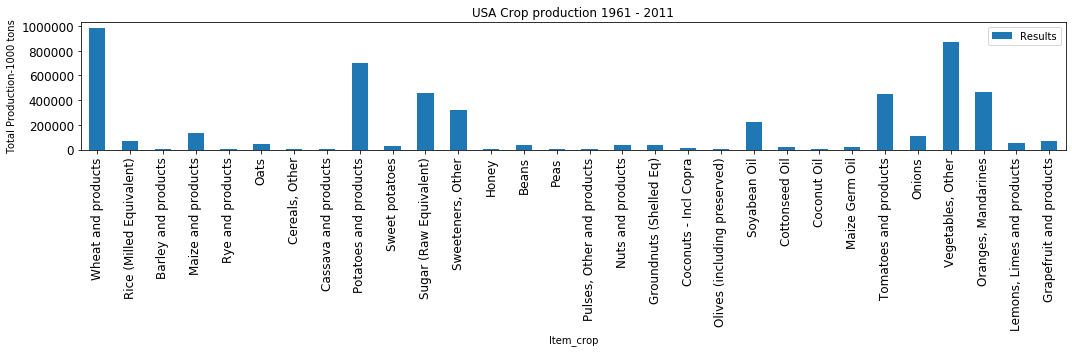

In [25]:
ax = usa_plot.head(30)[['Results']].plot(kind='bar', title ="USA Crop production 1961 - 2011", figsize=(15, 5), legend=True, fontsize=12)
plt.ylabel("Total Production-1000 tons")
plt.tight_layout()
plt.savefig("figure.png") 